# Boston Housing Problem 
   Import the necessary libraries 

In [86]:
import numpy as np 
import pandas as pd 
import matplotlib 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Load the data 

In [75]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data = pd.read_csv('./data/housing.csv',delim_whitespace=True, names=names)
print (data.head())

      CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO  \
0  6.3e-03  18.0    2.3     0  0.5  6.6  65.2  4.1    1  296.0     15.3   
1  2.7e-02   0.0    7.1     0  0.5  6.4  78.9  5.0    2  242.0     17.8   
2  2.7e-02   0.0    7.1     0  0.5  7.2  61.1  5.0    2  242.0     17.8   
3  3.2e-02   0.0    2.2     0  0.5  7.0  45.8  6.1    3  222.0     18.7   
4  6.9e-02   0.0    2.2     0  0.5  7.1  54.2  6.1    3  222.0     18.7   

       B  LSTAT  MEDV  
0  396.9    5.0  24.0  
1  396.9    9.1  21.6  
2  392.8    4.0  34.7  
3  394.6    2.9  33.4  
4  396.9    5.3  36.2  


In [76]:
print (data.shape)

(506, 14)


In [77]:
pd.set_option('precision', 1)
print (data.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


RM' is the average number of rooms among homes in the neighborhood. 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor). 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

In [78]:
print (data.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


CHAS, LSTAT, TAX, RM, PTRATION, B are the important features for predicting the MEDV. Rest all can be removed from the dataset

In [79]:
price = data['MEDV']
data = data.drop(['CRIM','ZN','INDUS','NOX','AGE','DIS','RAD'], axis = 1)
features = data.drop('MEDV', axis = 1)

print (features.head())

   CHAS   RM    TAX  PTRATIO      B  LSTAT
0     0  6.6  296.0     15.3  396.9    5.0
1     0  6.4  242.0     17.8  396.9    9.1
2     0  7.2  242.0     17.8  392.8    4.0
3     0  7.0  222.0     18.7  394.6    2.9
4     0  7.1  222.0     18.7  396.9    5.3


Multivariate visualisation

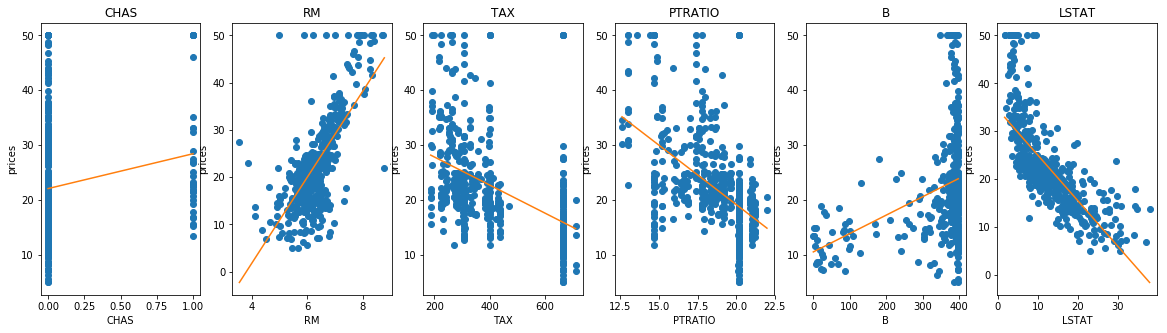

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 6, i+1)
    x = data[col]
    y = price
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

Train Test Split the data


In [81]:
validation_size = 0.2
array = data.values
X = array[:,0:6]
Y = array[:,6]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [96]:
num_folds = 10
seed = 7
RMS = 'neg_mean_squared_error'


models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
results = []
names = []
score = []
for name,model in models:
    kfold = KFold(n_splits = num_folds,random_state=seed)
    model.fit(X_train,Y_train)
    result = cross_val_score(model,X_train,Y_train,cv=kfold,scoring=RMS)
    results.append(result)
    names.append(name)
    msg = "model %s: mean %f std (%f)" % (name, result.mean(), result.std())
    print (msg)

model LR: mean -23.768361 std (8.605772)
model LASSO: mean -27.493923 std (10.882721)
model EN: mean -29.810753 std (11.625759)
model KNN: mean -31.329157 std (9.939710)
model CART: mean -27.079276 std (12.742488)
model SVR: mean -80.981430 std (31.368760)
